Epoch [1/5] - Loss: 0.4031
Epoch [2/5] - Loss: 0.1896
Epoch [3/5] - Loss: 0.1368
Epoch [4/5] - Loss: 0.1099
Epoch [5/5] - Loss: 0.0954
🎯 Test Accuracy: 96.89%


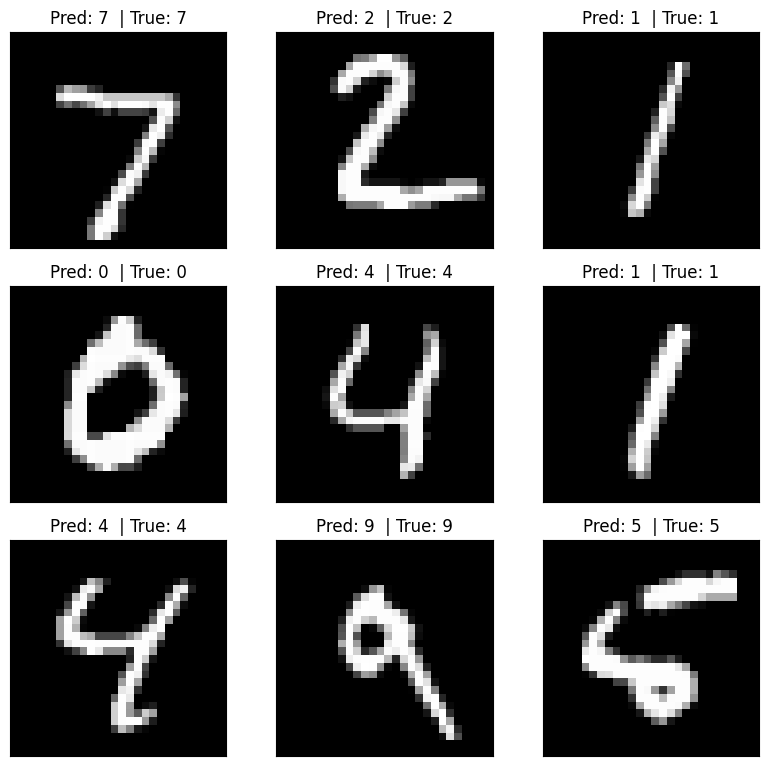

In [7]:
# ------------------------------------------
# 🎯 Handwritten Digit Recognition (MNIST)
# Using PyTorch in Google Colab
# ------------------------------------------

# Step 1: Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Step 2: Load and Transform the MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),              # convert image to tensor
    transforms.Normalize((0.5,), (0.5,))  # normalize pixel values
])

train_dataset = torchvision.datasets.MNIST(
    root='./data', train=True, download=True, transform=transform
)
test_dataset = torchvision.datasets.MNIST(
    root='./data', train=False, download=True, transform=transform
)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Step 3: Define the Neural Network
class DigitClassifier(nn.Module):
    def __init__(self):
        super(DigitClassifier, self).__init__()
        self.layer1 = nn.Linear(28*28, 128)
        self.layer2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)   # flatten the image (28x28 → 784)
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.output(x)
        return x

model = DigitClassifier()

# Step 4: Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 5: Train the Model
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()        # reset gradients
        outputs = model(images)      # forward pass
        loss = criterion(outputs, labels)  # compute loss
        loss.backward()              # backpropagate
        optimizer.step()             # update weights
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {running_loss/len(train_loader):.4f}")

# Step 6: Evaluate Model Accuracy
correct = 0
total = 0
with torch.no_grad():  # no need to compute gradients
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"🎯 Test Accuracy: {100 * correct / total:.2f}%")

# Step 7: Visualize Some Predictions
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

with torch.no_grad():
    output = model(example_data)
fig = plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title(f"Pred: {output.data.max(1, keepdim=True)[1][i].item()}  | True: {example_targets[i]}")
    plt.xticks([])
    plt.yticks([])
plt.show()
